In [1]:

### Import
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

In [2]:
##finding chessboard corners(test)
"""
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
test = cv2.imread('camera_cal/calibration2.jpg')
gray_img=cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)
ret,corners = cv2.findChessboardCorners(gray_img,(nx,ny),None)
if ret==True:
    corners2 = cv2.cornerSubPix(gray_img,corners,(11,11),(-1,-1),criteria)
    cv2.drawChessboardCorners(test,(nx,ny),corners2,ret)
    plt.imshow(test)
    cv2.imwrite('test.jpg',test)
    
"""


"\ncriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)\ntest = cv2.imread('camera_cal/calibration2.jpg')\ngray_img=cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)\nret,corners = cv2.findChessboardCorners(gray_img,(nx,ny),None)\nif ret==True:\n    corners2 = cv2.cornerSubPix(gray_img,corners,(11,11),(-1,-1),criteria)\n    cv2.drawChessboardCorners(test,(nx,ny),corners2,ret)\n    plt.imshow(test)\n    cv2.imwrite('test.jpg',test)\n    \n"

#  Camera_calibration

In [3]:
##Camera Calibration
nx = 9
ny =6
#list all the images in the directory
images = glob.glob('camera_cal/calibration*.jpg')
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
obj_points = [] #3d 
img_points=[] #2d
objp =np.zeros((ny * nx,3),np.float32)
chessboard_corners=[]
objp[:,:2]=np.mgrid[0:nx,0:ny].T.reshape(-1,2)
for idx,fname in enumerate(images):
    image = cv2.imread(fname)
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    ret,corners = cv2.findChessboardCorners(gray_img,(nx,ny),None)

    
    if ret==True:
        obj_points.append(objp)
        corners2 = cv2.cornerSubPix(gray_img,corners,(11,11),(-1,-1),criteria)
        img_points.append(corners2)
        chessboard_corners.append(cv2.drawChessboardCorners(image,(nx,ny),corners,ret))
    else:
        chessboard_corners.append(image)

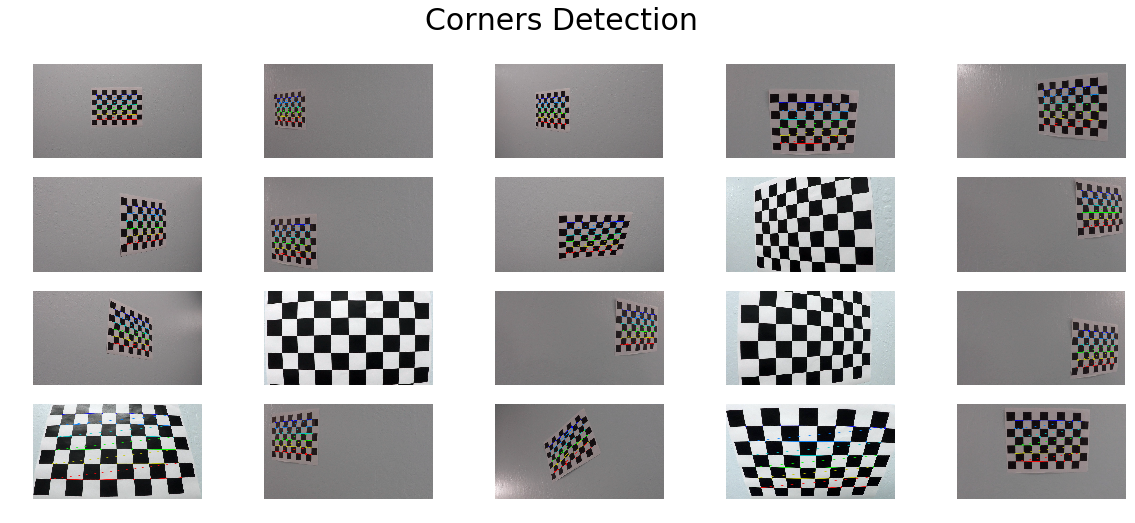

In [4]:
fig = plt.figure(figsize=(20,8))
for r in range(1,len(chessboard_corners)+1):
    fig.add_subplot(4,5,r)
    plt.imshow(chessboard_corners[r-1])
    plt.axis('off')
plt.suptitle('Corners Detection',size=30)
plt.show()

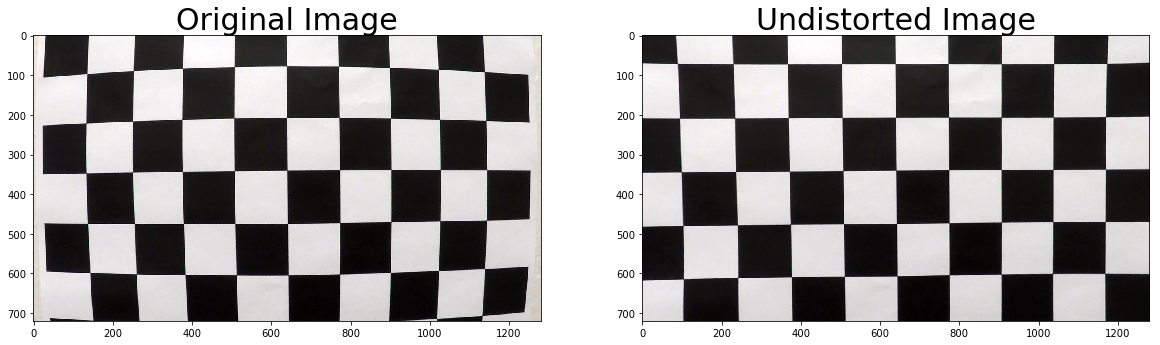

In [5]:
img = mpimg.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Calibrate Camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, img_size, None, None)

# Undistort Test Image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
undist_image = cv2.undistort(img, mtx, dist, None, mtx)
ax1.imshow(img)
ax2.imshow(undist_image)
ax1.set_title('Original Image', fontsize=30)
ax2.set_title('Undistorted Image', fontsize=30)
plt.show();

In [6]:
# Save the camera calibration result
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "dist_pickle.p", "wb" ) )